In [1]:
#https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/ZABHCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import csv

In [2]:
with open('597Final.csv', mode = "r") as qualData:     #Importing data from CSV file
    qualData = csv.reader(qualData)
    qualData = pd.DataFrame(qualData)
    qualData = qualData.iloc[1:, :]

In [12]:
#Logistic Regression Without Depression Variable

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.inspection import permutation_importance

X = qualData[[2, 3, 4, 5, 6, 7, 8, 9, 10]] #Variables other than depression
y = qualData[[1]] #Voter turnout is the target variable

X = X.rename(columns = {2: "Female", 3: "Age", 4: "Education", 5: "Hispanic", 6: "Black", 7: "Income", 8: "Married", 9: "ChurchAttend", 10: "Unemployed"})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1337)

In [4]:

lr = LogisticRegression()              #Logistic Regression
sc = StandardScaler()                  #Scale Data

sc.fit(X_train)
X_train_std = sc.transform(X_train)
y_train_std = np.ravel(y_train)

y_train = pd.DataFrame(y_train)
X_train = pd.DataFrame(X_train)

y_train.dropna
X_train.dropna

lr.fit(X_train_std, y_train_std)

print("Training Logistic Regression Accuracy:", lr.score(X_train, y_train))

# Make predictions on the test data                        
y_pred = lr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test Mean Squared Error: {mse:.2f}")
print(f"Test R-squared: {r2:.2f}")
print("Test Logistic Regression Accuracy:", lr.score(X_test, y_test))


Training Logistic Regression Accuracy: 0.6516220028208745
Test Mean Squared Error: 0.36
Test R-squared: -0.56
Test Logistic Regression Accuracy: 0.639344262295082


In [5]:
#Logistic Regression With Depression Variable

XX = qualData[[0, 2, 3, 4, 5, 6, 7, 8, 9, 10]] #Variables including Depression
yy = qualData[[1]] #Voter turnout is the target variable

XX = XX.rename(columns = {0: "Depression", 2: "Female", 3: "Age", 4: "Education", 5: "Hispanic", 6: "Black", 7: "Income", 8: "Married", 9: "ChurchAttend", 10: "Unemployed"})

# Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(XX, yy, test_size = 0.3, random_state = 1337)

In [6]:

lr2 = LogisticRegression()              #Logistic Regression
sc2 = StandardScaler()                  #Scale Data

sc2.fit(X_train2)
X_train_std2 = sc2.transform(X_train2)
y_train_std2 = np.ravel(y_train2)

y_train2 = pd.DataFrame(y_train2)
X_train2 = pd.DataFrame(X_train2)

y_train2.dropna
X_train2.dropna

lr2.fit(X_train_std2, y_train_std2)

print("Training Logistic Regression Accuracy:", lr2.score(X_train2, y_train2))

# Make predictions on the test data                        
y_pred2 = lr2.predict(X_test2)

# Evaluate the model
mse2 = mean_squared_error(y_test2, y_pred2)
r22 = r2_score(y_test2, y_pred2)

print(f"Test Mean Squared Error: {mse2:.2f}")
print(f"Test R-squared: {r22:.2f}")
print("Test Logistic Regression Accuracy:", lr2.score(X_test2, y_test2))

Training Logistic Regression Accuracy: 0.6516220028208745
Test Mean Squared Error: 0.36
Test R-squared: -0.56
Test Logistic Regression Accuracy: 0.639344262295082


/swst/apps/anaconda3/2021.05_gcc-8.5.0/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy: 0.7311475409836066

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.48      0.56       110
           1       0.75      0.87      0.81       195

    accuracy                           0.73       305
   macro avg       0.71      0.68      0.68       305
weighted avg       0.72      0.73      0.72       305

[ 0.00065574  0.11081967 -0.00327869 -0.00327869  0.00327869  0.00852459
  0.          0.00131148  0.        ]


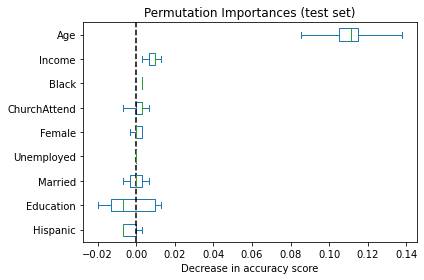

In [13]:
#SVM code without Depression

from sklearn.svm import SVC

# Create an SVM model (in this case, a linear SVM)
svm = SVC(kernel = 'linear', C=1.0, random_state=1)

# Train the SVM model on the training data
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print a classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

perm_importance = permutation_importance(svm, X_test, y_test)

# Access the importance scores
feature_perm = perm_importance.importances_mean

print(feature_perm)

#Graphing the most important features

sorted_importances_idx = perm_importance.importances_mean.argsort()
importances = pd.DataFrame(
    perm_importance.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],)

SVMP = importances.plot.box(vert=False, whis=10)
SVMP.set_title("Permutation Importances (test set)")
SVMP.axvline(x=0, color="k", linestyle="--")
SVMP.set_xlabel("Decrease in accuracy score")
SVMP.figure.tight_layout()


/swst/apps/anaconda3/2021.05_gcc-8.5.0/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy: 0.7245901639344262

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.48      0.56       110
           1       0.75      0.86      0.80       195

    accuracy                           0.72       305
   macro avg       0.70      0.67      0.68       305
weighted avg       0.72      0.72      0.71       305

[-0.01967213  0.00065574  0.06032787 -0.00852459 -0.00065574 -0.00262295
 -0.00918033 -0.00918033 -0.01245902  0.00131148]


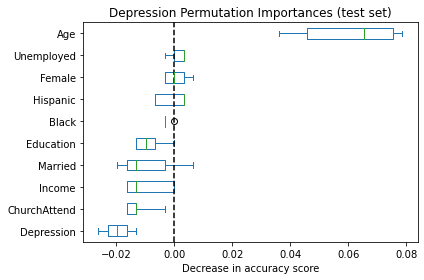

In [9]:
#SVM code with Depression

from sklearn.svm import SVC

# Create an SVM model (in this case, a linear SVM)
svm = SVC(kernel = 'linear', C=1.0, random_state=1)

# Train the SVM model on the training data
svm.fit(X_train2, y_train2)

# Make predictions on the test data
y_pred2 = svm.predict(X_test2)

# Evaluate the model
accuracy = accuracy_score(y_test2, y_pred2)
print("Accuracy:", accuracy)

# Print a classification report
report = classification_report(y_test2, y_pred2)
print("\nClassification Report:\n", report)

# Calculate permutation importance

from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(svm, X_test2, y_test2)

# Access the importance scores
feature_perm = perm_importance.importances_mean

print(feature_perm)

#Graphing the most important features

sorted_importances_idx = perm_importance.importances_mean.argsort()
importances = pd.DataFrame(
    perm_importance.importances[sorted_importances_idx].T,
    columns=XX.columns[sorted_importances_idx],)

SVMP = importances.plot.box(vert=False, whis=10)
SVMP.set_title("Depression Permutation Importances (test set)")
SVMP.axvline(x=0, color="k", linestyle="--")
SVMP.set_xlabel("Decrease in accuracy score")
SVMP.figure.tight_layout()

<ipython-input-10-15c263a32804>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train) #Training the algorithm using the training set


Accuracy: 0.69
              precision    recall  f1-score   support

           0       0.57      0.55      0.56       110
           1       0.75      0.76      0.76       195

    accuracy                           0.69       305
   macro avg       0.66      0.65      0.66       305
weighted avg       0.68      0.69      0.68       305

[ 0.00262295  0.05245902  0.0295082  -0.00590164  0.00459016  0.01245902
 -0.00459016 -0.00131148 -0.00786885]


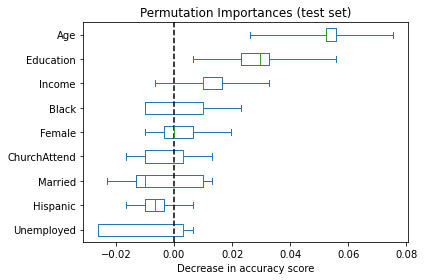

In [10]:
#random forest code without depression

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators determines the number of decision trees that will be created
clf.fit(X_train, y_train) #Training the algorithm using the training set
y_pred = clf.predict(X_test) # predicting attrition outcomes from the x variables in the testing set

#Calculating accuracy scores

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

report = classification_report(y_test, y_pred)
print(report)

# Calculate permutation importance
perm_importance = permutation_importance(clf, X_test, y_test)

# Access the importance scores
feature_perm = perm_importance.importances_mean

print(feature_perm)

#Graphing the most important features

sorted_importances_idx = perm_importance.importances_mean.argsort()
importances = pd.DataFrame(
    perm_importance.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],)

SVMP = importances.plot.box(vert=False, whis=10)
SVMP.set_title("Permutation Importances (test set)")
SVMP.axvline(x=0, color="k", linestyle="--")
SVMP.set_xlabel("Decrease in accuracy score")
SVMP.figure.tight_layout()

<ipython-input-11-a8fbcc5ce7a4>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train2, y_train2) #Training the algorithm using the training set


Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.65      0.55      0.59       110
           1       0.77      0.84      0.80       195

    accuracy                           0.73       305
   macro avg       0.71      0.69      0.70       305
weighted avg       0.72      0.73      0.73       305

[ 0.02819672  0.01245902  0.07606557  0.05508197 -0.00590164  0.00983607
  0.01639344  0.00262295  0.0104918   0.00655738]


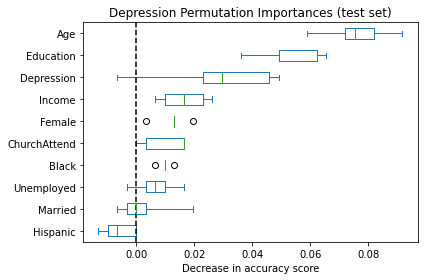

In [11]:
#random forest code with depression

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100, random_state = 42) # n_estimators determines the number of decision trees that will be created
clf.fit(X_train2, y_train2) #Training the algorithm using the training set
y_pred2 = clf.predict(X_test2) # predicting attrition outcomes from the x variables in the testing set

#Calculating accuracy scores

accuracy = accuracy_score(y_test2, y_pred2)
print(f'Accuracy: {accuracy:.2f}')

report = classification_report(y_test2, y_pred2)
print(report)

# Calculate permutation importance
perm_importance = permutation_importance(clf, X_test2, y_test2)

# Access the importance scores
feature_perm = perm_importance.importances_mean

print(feature_perm)

#Graphing the most important features

sorted_importances_idx = perm_importance.importances_mean.argsort()
importances = pd.DataFrame(
    perm_importance.importances[sorted_importances_idx].T,
    columns=XX.columns[sorted_importances_idx],)

SVMP = importances.plot.box(vert=False, whis=10)
SVMP.set_title("Depression Permutation Importances (test set)")
SVMP.axvline(x=0, color="k", linestyle="--")
SVMP.set_xlabel("Decrease in accuracy score")
SVMP.figure.tight_layout()

/swst/apps/anaconda3/2021.05_gcc-8.5.0/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.71
              precision    recall  f1-score   support

           0       0.60      0.57      0.59       110
           1       0.77      0.78      0.77       195

    accuracy                           0.71       305
   macro avg       0.68      0.68      0.68       305
weighted avg       0.71      0.71      0.71       305

[ 0.00852459  0.10295082  0.01245902 -0.00131148 -0.00655738  0.05967213
  0.00196721  0.03934426 -0.00327869]


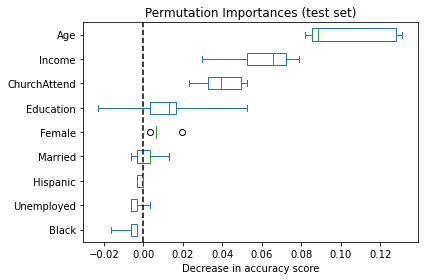

In [42]:
#KNN without depression

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

report = classification_report(y_test, y_pred)
print(report)

#Finding the most important features

perm_importance = permutation_importance(knn, X_test, y_test)

# Access the importance scores
feature_perm = perm_importance.importances_mean

print(feature_perm)

#Graphing the most important features

sorted_importances_idx = perm_importance.importances_mean.argsort()
importances = pd.DataFrame(
    perm_importance.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],)

SVMP = importances.plot.box(vert=False, whis=10)
SVMP.set_title("Permutation Importances (test set)")
SVMP.axvline(x=0, color="k", linestyle="--")
SVMP.set_xlabel("Decrease in accuracy score")
SVMP.figure.tight_layout()

/swst/apps/anaconda3/2021.05_gcc-8.5.0/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.70
              precision    recall  f1-score   support

           0       0.59      0.55      0.57       110
           1       0.75      0.78      0.77       195

    accuracy                           0.70       305
   macro avg       0.67      0.67      0.67       305
weighted avg       0.69      0.70      0.70       305

[-7.86885246e-03 -1.31147541e-03  1.05573770e-01  1.90163934e-02
 -2.22044605e-17 -2.22044605e-17  4.26229508e-02  3.93442623e-03
  5.24590164e-03  4.59016393e-03]


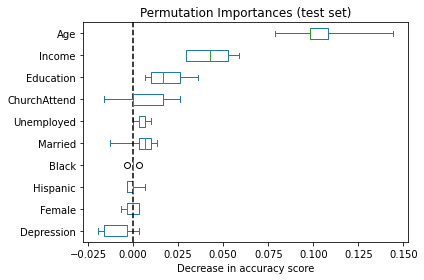

In [43]:
#KNN with depression

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train2, y_train2)

y_pred2 = knn.predict(X_test2)

accuracy = accuracy_score(y_test2, y_pred2)
print(f'Accuracy: {accuracy:.2f}')

report = classification_report(y_test2, y_pred2)
print(report)

#Finding the most important features

perm_importance = permutation_importance(knn, X_test2, y_test2)

# Access the importance scores
feature_perm = perm_importance.importances_mean

print(feature_perm)

#Graphing the most important features

sorted_importances_idx = perm_importance.importances_mean.argsort()
importances = pd.DataFrame(
    perm_importance.importances[sorted_importances_idx].T,
    columns=XX.columns[sorted_importances_idx],)

SVMP = importances.plot.box(vert=False, whis=10)
SVMP.set_title("Depression Permutation Importances (test set)")
SVMP.axvline(x=0, color="k", linestyle="--")
SVMP.set_xlabel("Decrease in accuracy score")
SVMP.figure.tight_layout()